# Este programa faz uma análise do campo "vacina_descricao_dose"
# para identificar se é a 1. Dose ou já e a 2.Dose da vacina
# contra a COVID-19


In [6]:
import requests 
import pandas as pd
import time
from datetime import datetime
import csv

# Importar bibliotecas para construir gráficos:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Leitura do arquivo de Vacinacao completo selecionando alguns
# campos para pesquisa:

df = pd.read_csv("vacinas_2021-04-10-1357.csv", sep=";", 
                 usecols = ['vacina_fabricante_nome',
                            'paciente_idade',
                            'vacina_dataAplicacao',
                            'paciente_endereco_uf',
                            'vacina_descricao_dose'])
                                       

# Após a execução do programa: Rodar-Programa-Alguns-Campos-Vacina
para obter o número total de vacinados atualizados!!!


In [8]:
#Verificar o conteúdo do campo "vacina_descricao_dose"

df["vacina_descricao_dose"].unique()

array(['\xa0\xa0\xa0\xa02ª\xa0Dose', '\xa0\xa0\xa0\xa01ª\xa0Dose',
       '\xa0\xa0\xa0\xa0Dose\xa0', '\xa0\xa0\xa0\xa0Única\xa0'],
      dtype=object)

In [10]:
# Fazendo uma limpeza do campo "vacina_descricao_dose"
# Cria um campo de "copia_vacia_dose"

df["copia_vacina_dose"] = df["vacina_descricao_dose"]
df["copia_vacina_dose"] = (df["copia_vacina_dose"]
                              .str.lower()
                              .str.normalize("NFKD")
                              .str.encode("ascii", errors="ignore")
                              .str.decode("utf-8"))
df["copia_vacina_dose"].value_counts

<bound method IndexOpsMixin.value_counts of 0               2a dose
1               2a dose
2               1a dose
3               1a dose
4               1a dose
               ...     
26434676        2a dose
26434677        1a dose
26434678        1a dose
26434679        1a dose
26434680        2a dose
Name: copia_vacina_dose, Length: 26434681, dtype: object>

In [11]:
# Verifica o conteúdo do campo "vacina_dose"

df["copia_vacina_dose"].unique()

array(['    2a dose', '    1a dose', '    dose ', '    unica '],
      dtype=object)

# Faz a contagem do campo "vacina_dose" no Brasil:
1) se foi aplicado somente a 1. Dose, 
2) se já foram aplicados as duas doses da vacina!!

In [12]:

Primeira_dose = len(df.loc[(df.copia_vacina_dose == '    1a dose')])
Segunda_dose = len(df.loc[(df.copia_vacina_dose == '    2a dose')])
Dose_unica = len(df.loc[(df.copia_vacina_dose == '    unica ')])
#So_dose = len(df.loc[(df.copia_vacina_dose] )

print('As Doses de Vacinas Aplicadas no BRASIL:\n')
print('Total da Primeira dose vacina:', Primeira_dose)
print('Total da Segunda dose vacina:', Segunda_dose)
print("Dose Única:", Dose_unica)
vacinados = Primeira_dose + Segunda_dose
print('TOtal de vacinados =', vacinados)

As Doses de Vacinas Aplicadas no BRASIL:

Total da Primeira dose vacina: 20466857
Total da Segunda dose vacina: 5967695
Dose Única: 3
TOtal de vacinados = 26434552


# Verificando o campo "vacina_data_Aplicacao" para montar gráfico:

In [27]:
#df['vacina_dataAplicacao'] = pd.datetime(df['vacina_dataAplicacao'])






SyntaxError: invalid character in identifier (<ipython-input-27-685c5b4e25d9>, line 4)

AttributeError: 'DataFrame' object has no attribute 'Segunda_dose'

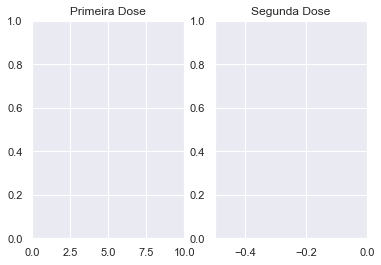

In [5]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.title ("Primeira Dose")
plt.xlim((0,10))




fig.add_subplot(1,2,2)
plt.title("Segunda Dose")
plt.xlim(-.5,0)

plt.plot(df.Segunda_dose)


# ===>>> vou buscar outro campo "vacina_data_aplicacao"